# Data Example
This notebook illustrates the type of data U-Net uses for training and testing. Specifically, we will demonstrate the [intended uses-case](#intended-use-case) and how U-Net handles some [exceptions](#exceptions).

First open up the shell/terminal you used for installation and activate the virtual environment you [installed](https://github.com/CSDGroup/aisegcell#installation). If you want to run this notebook interactively, you will have to manually `pip install jupyterlab` in your shell and check out [the documentation](https://docs.jupyter.org/en/latest/) on how to use it.

## Intended use-case
U-Net is currently intended for single-class semantic segmentation. Input images are expected to be 8-bit or 16-bit greyscale images. Segmentation masks are expected to decode background as 0 intensity and all intensities >0 are converted to a single intensity value (255). Consequently, different instances of a class (instance segmentation) or multi-class segmentations are handled as single-class segmentations.

In [ ]:
# install pooch if necessary
!pip install pooch

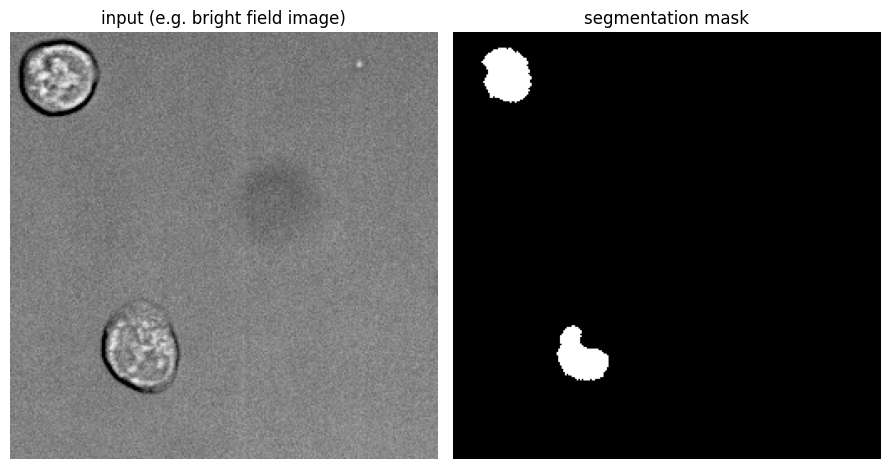

In [3]:
import pooch

import matplotlib.pyplot as plt

from skimage import io

# download sample data
THATCHER = pooch.create(
    path=pooch.os_cache('aisegcell'),
    base_url='https://github.com/CSDGroup/aisegcell/raw/521be0b66d497791d82e75c8211ac62cb31f6a2e/images/',
    registry={
        'bf1.png': (
            '06047311573206ee8c31716ac0e25116a18159e48c1201c7d8b3cdbd398fc2b3'
        ),
        'mask1.png': (
            'dae2999292a623626f900bdb1ed854bf9e33b342ac50dd5633eef7adb5021db1'
        )
    }
)

img_path = THATCHER.fetch('bf1.png')
mask_path = THATCHER.fetch('mask1.png')

# load images
img = io.imread(img_path)
mask = io.imread(mask_path)

# Plot input and output
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(img, cmap="Greys_r")
axes[0].set_title("input (e.g. bright field image)")

axes[1].imshow(mask, cmap='Greys_r')
axes[1].set_title("segmentation mask")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()

## Exceptions
U-Net internally manages some exceptions by converting them to the intended use-case. Importantly, the altered versions of the masks are computed at run-time and not saved. The exceptions that U-Net can handle are multi-class semantic segmentation masks or instance segmentations masks. Below we illustrate exceptions and how U-Net handles them.

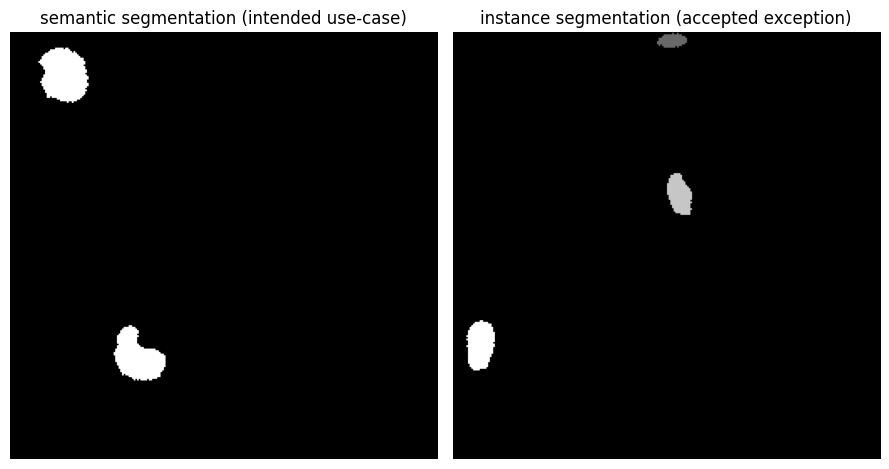

In [4]:
import pooch

import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage.measure import label

# download sample data
THATCHER = pooch.create(
    path=pooch.os_cache('aisegcell'),
    base_url='https://github.com/CSDGroup/aisegcell/raw/521be0b66d497791d82e75c8211ac62cb31f6a2e/images/',
    registry={
        'bf1.png': (
            '06047311573206ee8c31716ac0e25116a18159e48c1201c7d8b3cdbd398fc2b3'
        ),
        'mask1.png': (
            'dae2999292a623626f900bdb1ed854bf9e33b342ac50dd5633eef7adb5021db1'
        ),
        'bf2.png': (
            '90bf8dc0acb37f39141dd92be79d85f374e3929bb0aa0546e521980749b807d2'
        ),
        'mask2.png': (
            'de488a87cee7c48fe32e8b86833498a25235a56d5ee8ced5d470d31a6c846cd7'
        ),
    }
)

mask1_path = THATCHER.fetch('mask1.png')
mask2_path = THATCHER.fetch('mask2.png')

mask1 = io.imread(mask1_path)
mask2 = io.imread(mask2_path)

# convert mask2 to instance segmentation
mask2 = label(mask2)

# plot masks
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(mask1, cmap="Greys_r")
axes[0].set_title("semantic segmentation (intended use-case)")

axes[1].imshow(mask2, cmap='Greys_r')
axes[1].set_title("instance segmentation (accepted exception)")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()

Note how in the instance segmentation mask every nucleus/object has a different intensity value (greylevel). Internally, U-Net will set all nuclei/objects to the same intensity:

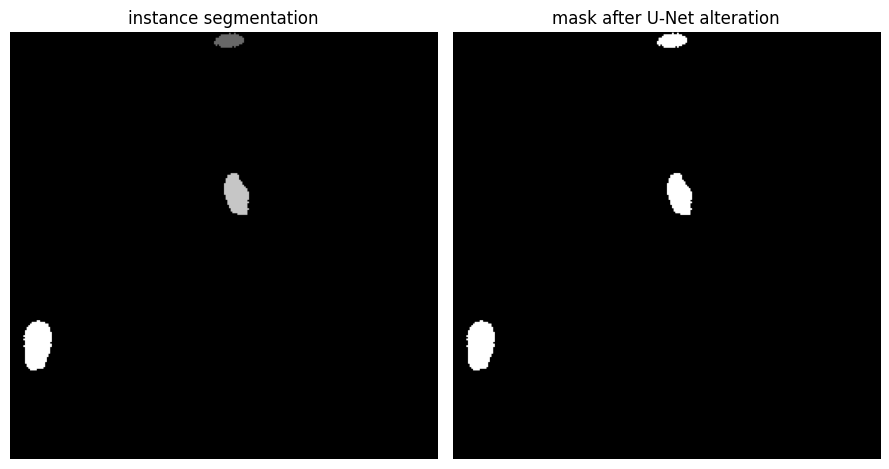

In [5]:
# how U-Net alters instance segmentation masks
mask2_new = mask2.copy()
mask2_new[mask2 > 0] = 255
mask2_new = mask2_new.astype(np.uint8)

# plot instance mask and its alteration
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(mask2, cmap="Greys_r")
axes[0].set_title("instance segmentation")

axes[1].imshow(mask2_new, cmap='Greys_r')
axes[1].set_title("mask after U-Net alteration")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()